In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Gerando o dataframe

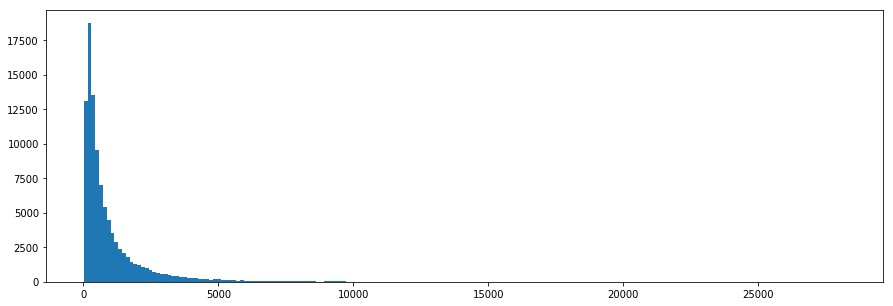

In [18]:
valores = np.random.wald(1000, 500, 100000)


plt.figure(figsize=(15,5))
h = plt.hist(valores, bins=200)

In [19]:
df = pd.DataFrame()

In [20]:
df['valor'] = valores

In [21]:
comercios = [
    'papelaria', 'farmacia', 'supermercado', 'minimercado', 'padaria', 'roupas', 'artigos esportivos', 'lembranças',
    'frutaria', 'confeitaria', 'restaurante', 'sorveteria', 'veterinário', 'loja de presentes', 'importados', 
    'sushi', 'fast-food', 'pastelaria', 'loja de sapatos', 'loja de eletrônicos', 'atacado', 'construção', 
    'artigos elétricos', 'consertos de celular', 'mecânico', 'lava-rápido'
]

In [22]:
tipo = []

for i in range(df.shape[0]):
    tipo.append(random.choice(comercios))
    
df['tipo_comercio']  = tipo

In [23]:
df['num_lojas'] = np.random.randint(1,15, df.shape[0])
df['num_funcionarios'] = np.random.randint(5,100, df.shape[0])

Text(0.5,0,'Número de lojas')

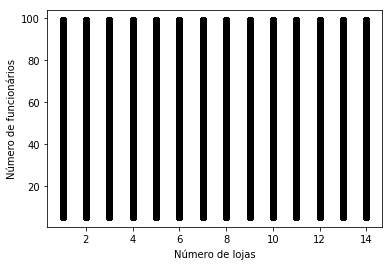

In [24]:
plt.scatter(df.num_lojas, df.num_funcionarios, c='black')
plt.ylabel('Número de funcionários')
plt.xlabel('Número de lojas')

In [8]:
df.head()

,valor,tipo_comercio,num_lojas,num_funcionarios
0,312.972976,papelaria,5,51
1,2016.348252,consertos de celular,3,42
2,163.588000,minimercado,7,38
3,105.588932,restaurante,5,97
4,285.700903,lava-rápido,4,91


In [9]:
df.describe()

,valor,num_lojas,num_funcionarios
count,100000.000000,100000.00000,100000.000000
mean,1003.894344,7.48465,51.961620
std,1404.375584,4.02726,27.419868
min,26.016755,1.00000,5.000000
25%,251.817590,4.00000,28.000000
50%,518.059687,7.00000,52.000000
75%,1158.143597,11.00000,76.000000
max,32685.761757,14.00000,99.000000


# Fazendo encoding das variáveis categóricas

In [10]:
encoder = LabelEncoder()

In [11]:
X = df[['tipo_comercio', 'num_lojas', 'num_funcionarios']]
y = df.valor

In [12]:
for col in X.columns.values:
    X[col] = encoder.fit_transform(X[col])

/home/leportella/.virtualenvs/data/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Análise de covariância com Elliptic Envelope considerando X e Y

In [13]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=0.01)
clf.fit(X, y)
inliers = clf.predict(X)

Text(0.5,1,'EllipticEnvelope - 1%')

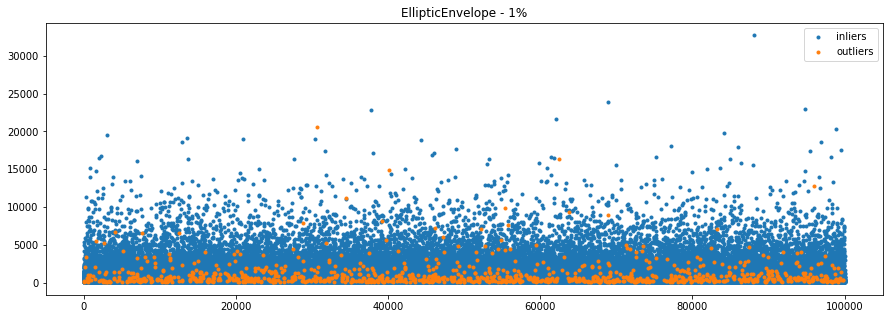

In [14]:
plt.figure(figsize=(15,5))
plt.plot(y[inliers>0],'.')
plt.plot(y[inliers<0],'.')
plt.legend(['inliers', 'outliers'])
plt.title('EllipticEnvelope - 1%')

# Análise de covariância com Elliptic Envelope considerando Y

In [15]:
yy  = y.values.reshape(-1,1)

from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=0.01)

clf.fit(yy)
inliers = clf.predict(yy)

Text(0.5,1,'EllipticEnvelope - 1%')

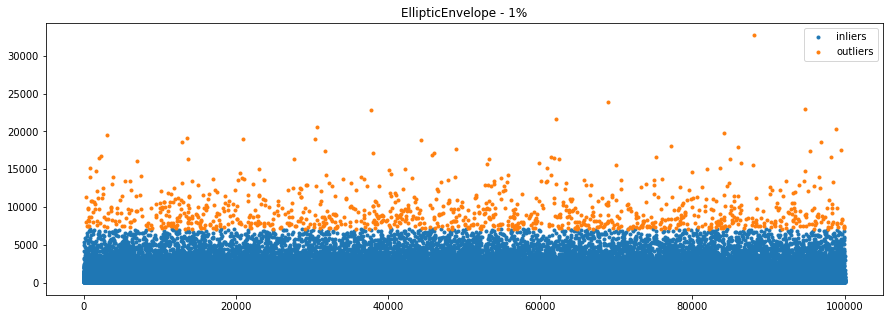

In [16]:
plt.figure(figsize=(15,5))
plt.plot(y[inliers>0],'.')
plt.plot(y[inliers<0],'.')
plt.legend(['inliers', 'outliers'])
plt.title('EllipticEnvelope - 1%')